In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading indurnce dataset
data = pd.read_csv("new_insurance_data.csv")
data.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [44]:
data.shape

(1338, 13)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [46]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [47]:
data.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [48]:
data.isnull().sum().sum()

52

In [49]:
col = data.columns
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [50]:
for column in col:
    if data[column].dtypes == "object" :
        data[column]= data[column].fillna(data[column].mode()[0])
    else:
        data[column]= data[column].fillna(data[column].mean())

In [51]:
data.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

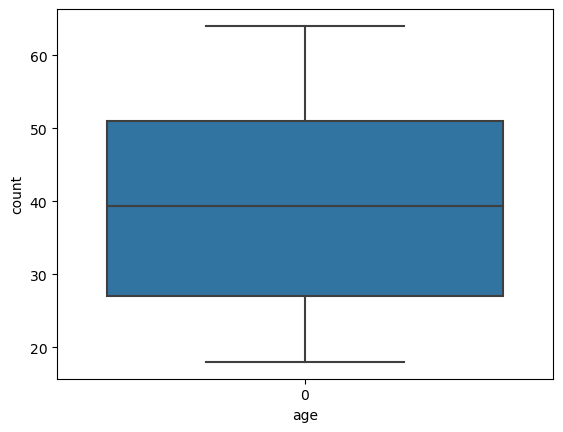

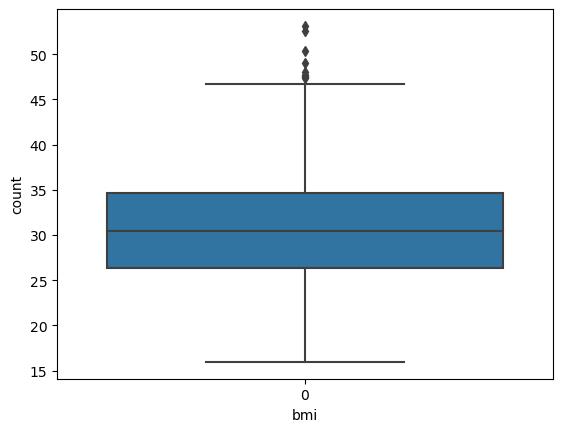

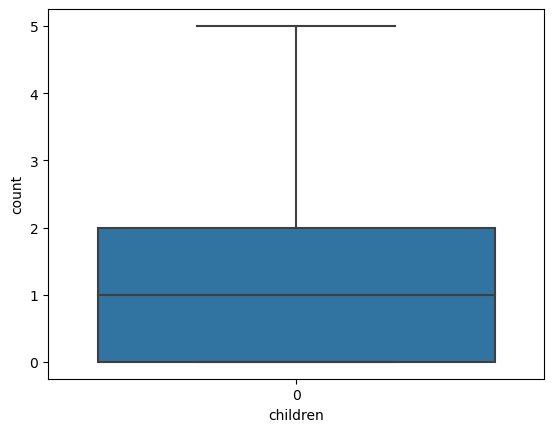

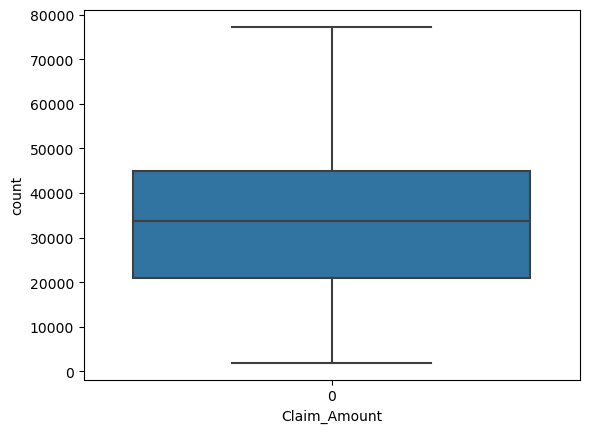

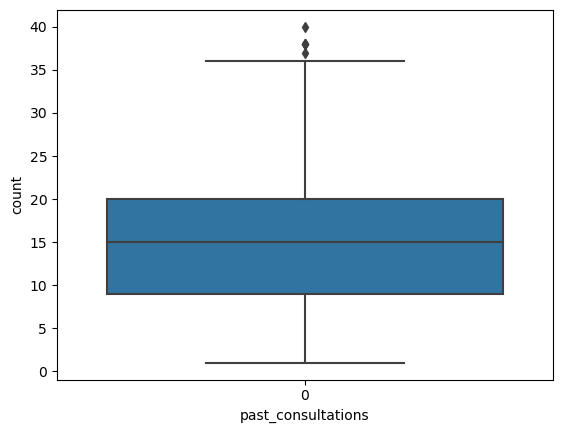

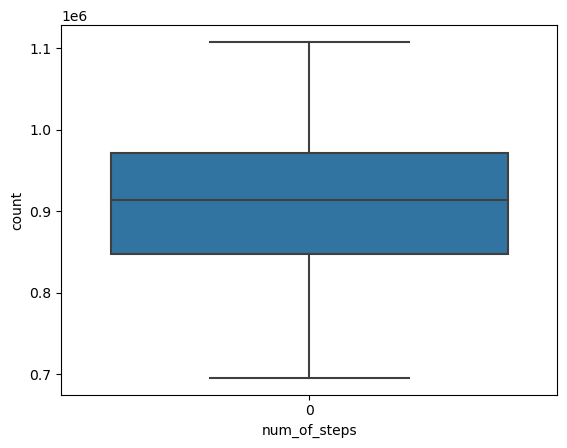

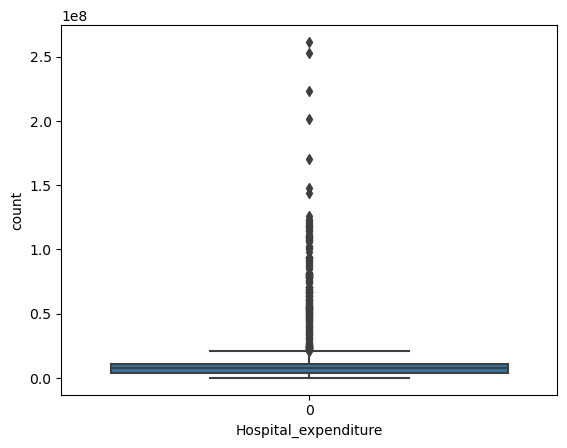

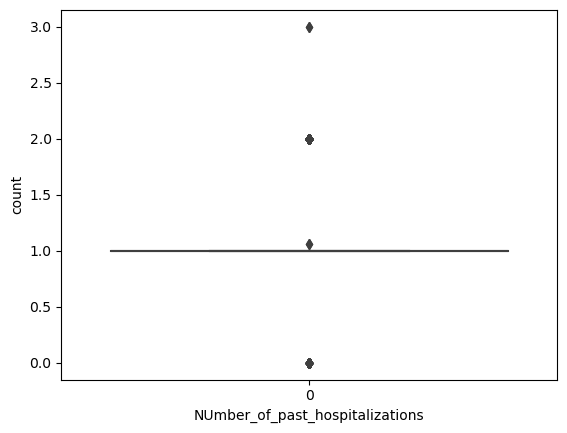

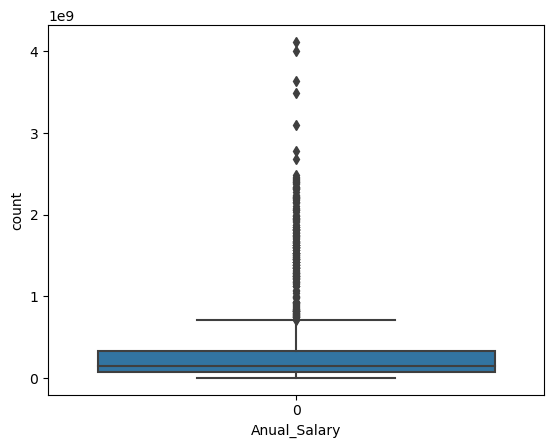

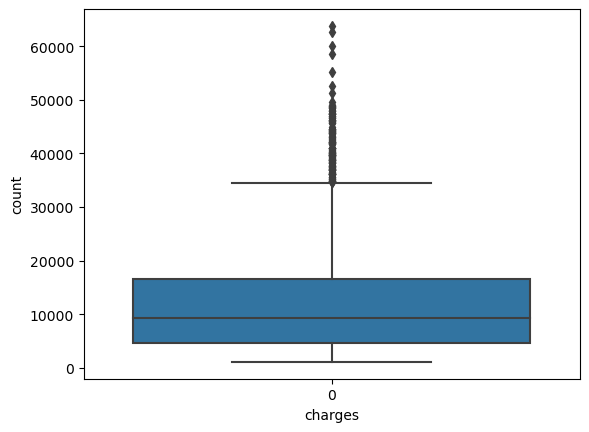

In [52]:
for col_name in col:
    if (data[col_name].dtypes == "int64" or data[col_name].dtypes== "float64"):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.show()

In [53]:
out_col = ["bmi","past_consultations", "Hospital_expenditure", "Anual_Salary"]

for column in out_col:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]


In [54]:
data.shape

(1030, 13)

In [55]:
data.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1.030000e+03,1030.000000,1.030000e+03,1030.000000
mean,38.643486,30.228884,1.066460,30267.786546,12.988428,873923.917561,5.990933e+06,0.856370,1.268518e+08,7653.996666
std,14.012418,5.987034,1.213582,14319.311327,5.957366,68958.498886,3.220088e+06,0.350974,8.195598e+07,4399.239848
min,18.000000,15.960000,0.000000,1920.136268,1.000000,695430.000000,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,26.000000,25.908750,0.000000,18001.007272,8.000000,827907.000000,3.316228e+06,1.000000,6.634997e+07,3928.113625
50%,38.500000,29.962500,1.000000,30819.743115,13.000000,886888.500000,6.012943e+06,1.000000,1.081183e+08,7167.686075
75%,51.000000,34.100000,2.000000,42058.656820,18.000000,930435.750000,8.496163e+06,1.000000,1.738031e+08,11080.226900
max,64.000000,46.750000,5.000000,60712.925340,27.000000,994419.000000,1.665982e+07,1.060629,3.829703e+08,20234.854750


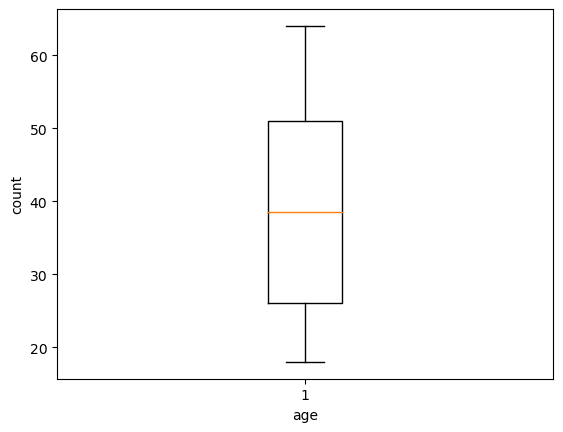

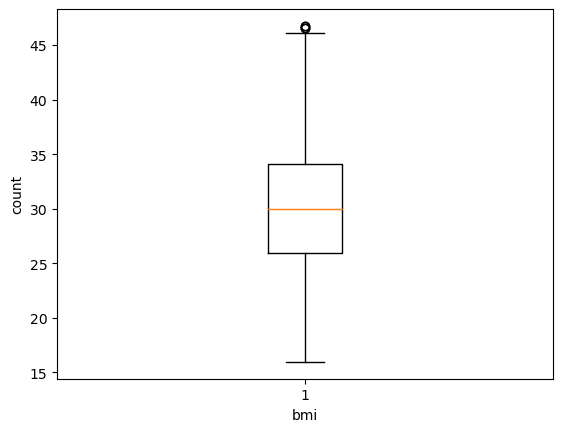

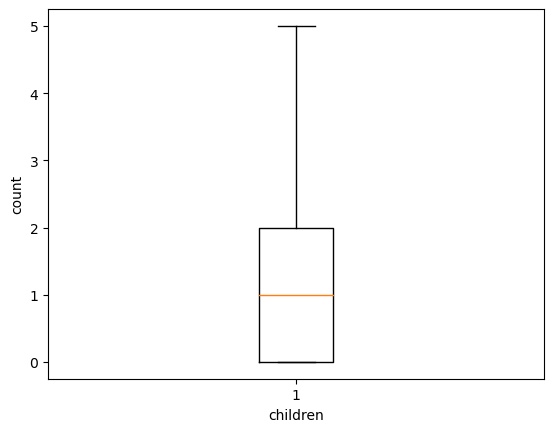

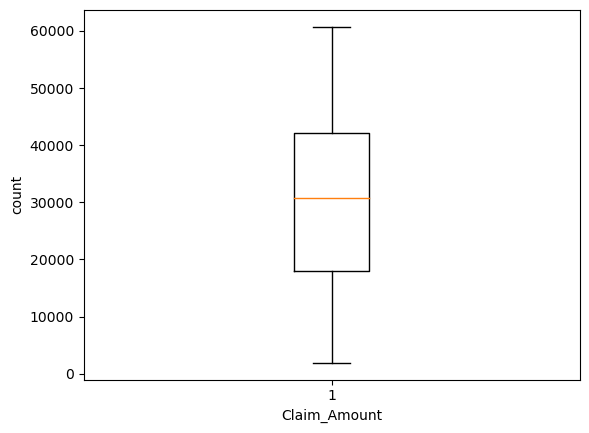

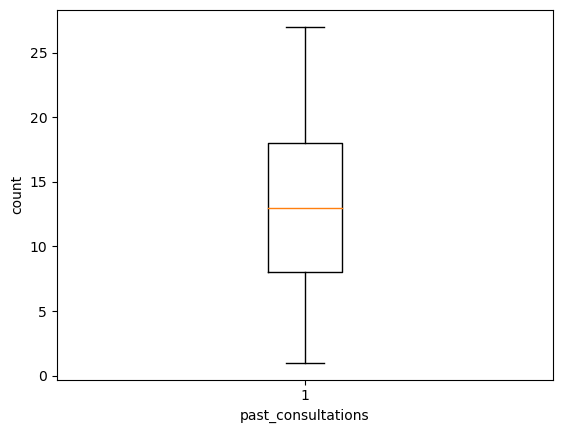

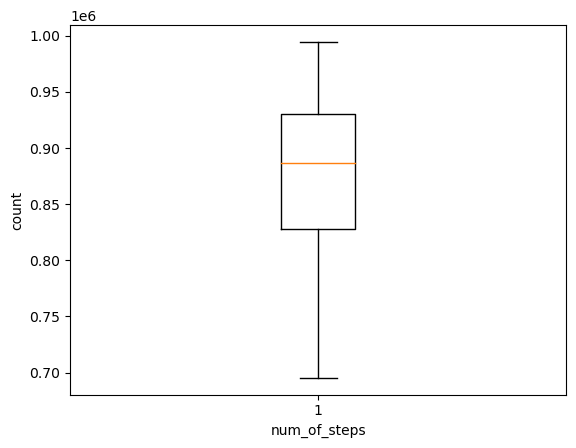

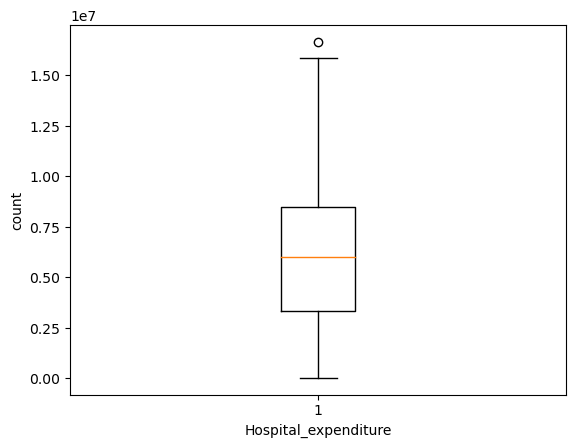

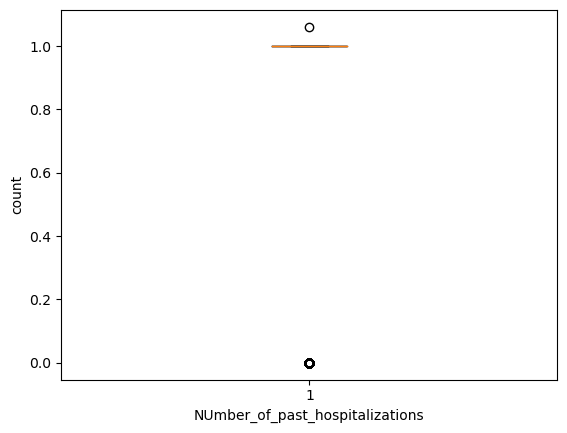

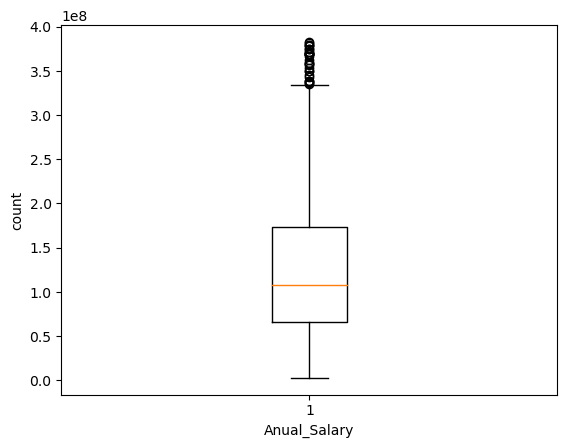

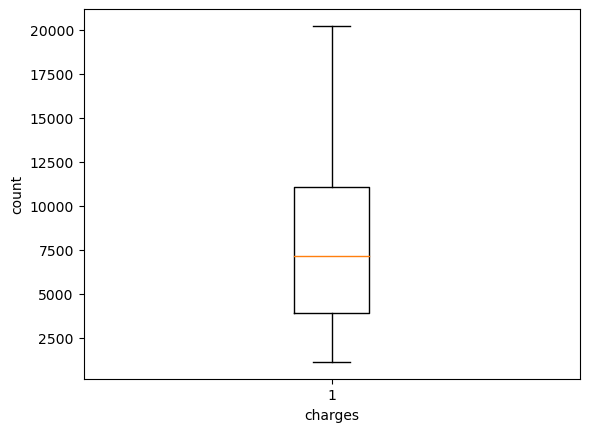

In [56]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [57]:
data

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,female,27.940,1.0,yes,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,southeast,19107.77960
1048,31.0,male,25.900,3.0,yes,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,southwest,19199.94400
1050,31.0,male,29.810,0.0,yes,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,southeast,19350.36890
1062,43.0,female,20.045,2.0,yes,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,northeast,19798.05455


In [58]:
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [59]:
data.shape

(1030, 13)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [63]:
my_col = []
for column in col:
    if ((data[column].dtype != "object") & (column != "charges" )):
        my_col.append(column)

In [64]:
my_col

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
my_col = []
for column in data.columns:
    if ((data[column].dtype != "object") & (column != "charges" )):
        my_col.append(column)
        
x = data[my_col]
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [69]:
vif_data

,feature,VIF
0,age,15.452095
1,bmi,26.330788
2,children,2.029618
3,Claim_Amount,5.678660
4,past_consultations,6.258017
5,num_of_steps,61.574692
6,Hospital_expenditure,5.204376
7,NUmber_of_past_hospitalizations,12.052060
8,Anual_Salary,5.481823


In [70]:
len(x.columns)

9

In [71]:
data = data.drop(["num_of_steps"],axis=1)

In [72]:
my_col=[]
for column in data.columns:
    if ((data[column].dtypes!="object") & (column!="charges")):
        my_col.append(column)
        
x = data[my_col]
vif_data= pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["vif"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

                           feature        vif
0                              age  14.484893
1                              bmi  12.261123
2                         children   2.017441
3                     Claim_Amount   5.243640
4               past_consultations   5.842169
5             Hospital_expenditure   4.929952
6  NUmber_of_past_hospitalizations  10.687768
7                     Anual_Salary   5.380679


In [73]:
len(x.columns)

8

In [74]:
my_col

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [75]:
data = data.drop("age",axis=1)

In [76]:
my_col=[]
for column in data.columns:
    if ((data[column].dtypes!="object") & (column!="charges")):
        my_col.append(column)
        
x = data[my_col]
vif_data= pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["vif"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

                           feature        vif
0                              bmi  10.323093
1                         children   1.978843
2                     Claim_Amount   5.228284
3               past_consultations   5.821933
4             Hospital_expenditure   4.929287
5  NUmber_of_past_hospitalizations   8.310570
6                     Anual_Salary   4.723495


In [77]:
data = data.drop("bmi",axis=1)

In [78]:
my_col=[]
for column in data.columns:
    if ((data[column].dtypes!="object") & (column!="charges")):
        my_col.append(column)
        
x = data[my_col]
vif_data= pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["vif"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

                           feature       vif
0                         children  1.977037
1                     Claim_Amount  4.547332
2               past_consultations  5.049165
3             Hospital_expenditure  4.492630
4  NUmber_of_past_hospitalizations  7.245972
5                     Anual_Salary  4.688833


In [79]:
data = data.drop("NUmber_of_past_hospitalizations",axis=1)

In [80]:
my_col=[]
for column in data.columns:
    if ((data[column].dtypes!="object") & (column!="charges")):
        my_col.append(column)
        
x = data[my_col]
vif_data= pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["vif"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

                feature       vif
0              children  1.713101
1          Claim_Amount  4.152224
2    past_consultations  4.670212
3  Hospital_expenditure  4.320876
4          Anual_Salary  4.279483


In [83]:
x = data.loc[:,["children","Claim_Amount","past_consultations","Hospital_expenditure","Anual_Salary"]]
y = data.iloc[:,-1]

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=0)

In [87]:
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
746,0.0,25238.363470,11.0,2.086869e+06,1.649883e+08
641,0.0,37222.476360,9.0,6.062378e+06,9.657123e+07
999,1.0,30825.190070,11.0,5.923489e+06,3.029514e+08
281,0.0,9560.754493,15.0,3.185350e+06,7.490390e+07
802,2.0,12992.139950,24.0,4.075903e+06,2.061268e+08
...,...,...,...,...,...
279,1.0,20150.675120,9.0,1.747107e+05,6.328892e+07
768,0.0,9582.708574,11.0,1.046259e+07,1.850292e+08
841,0.0,31405.793590,12.0,9.380141e+06,2.118739e+08
561,2.0,9816.604000,12.0,8.134594e+05,1.287152e+08


In [89]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 5)
(206, 5)
(824,)
(206,)


In [96]:
l_model= LinearRegression()

In [97]:
l_model.fit(x_train,y_train)

LinearRegression()

In [98]:
predictions = l_model.predict(x_test)

In [99]:
predictions

array([ 7410.79368292, 10525.46032916,  4225.68186834, 11784.67064226,
        9710.44769939,  2920.28422479,  7675.02920953,  3974.05235591,
        1998.90729711,  1644.33779822,  9355.99422158,  6212.23827285,
        7039.69058406,  6913.4106462 ,  7297.0505273 ,  8116.21854337,
        5359.21098612, 11610.94654975, 10731.85265305,  4125.98535048,
        4978.27582415,  7076.11959566,  5297.22536169, 10517.54532015,
        7970.32302539,  9134.27913297,  3195.07752333,  2030.84851755,
        7974.5318319 ,  6784.2193549 ,  9063.13892275,  9603.83277347,
        7310.54589069,  3127.05229651, 10815.26325584,  6390.86195986,
        2959.61224858,  5861.07915274,  8191.7821509 ,  3550.84253838,
        2770.66188064,  7533.68996882,  9234.00165879,  4599.21923178,
        7080.45812909,  6040.26489712,  9148.59452641,  9621.34374207,
        1845.77904492,  4786.94915213, 10787.39907086, 10725.71531506,
       10417.07991619,  4695.22528892,  7214.06291723,  4625.56717867,
      

In [113]:
error_pred=pd.DataFrame(columns=['Actual_data','Prediction_data'])

In [114]:
error_pred

,Actual_data,Prediction_data


In [117]:
error_pred["Actual_data"]= y_test
error_pred["Prediction_data"] = predictions

In [119]:
error_pred.head()

,Actual_data,Prediction_data
752,10704.4700,7410.793683
723,10197.7722,10525.460329
177,2801.2588,4225.681868
834,11848.1410,11784.670642
718,10107.2206,9710.447699


In [120]:
from sklearn.metrics import *

In [121]:
train_pred = l_model.predict(x_train)
train_pred

array([ 8636.77102076,  5889.89113882, 15510.15506332,  4534.92941325,
       11476.8923922 ,  4790.24544065,  2226.43019619, 14580.40311238,
       18281.06573485,  5779.13917531,  9971.98821711,  8280.80960392,
       12273.87781543, 17551.84469937,  2094.55275057,  5142.38710764,
       12387.39416343,  6423.03514025,  9022.97286233,  5124.91472943,
       15186.68881153,  3390.02964113,  7783.52737648, 12373.40805558,
        7044.87450697, 12537.01546368,  1984.92004357,  5292.93806285,
        5677.81955856,  6669.72484715, 18550.0882346 , 12171.85956404,
        3015.25403532,  5723.10604427,  1893.9007627 ,  4878.70389425,
       10253.08347323,  6787.5554486 ,  4519.0899566 ,  5930.20374602,
        8546.66285511,  3020.70144386,  7596.74648984,  4651.49079173,
        8319.69579178, 11814.77524627, 18159.61248909,  5380.48245879,
       10795.88105085,  9205.23720251, 12884.6309035 ,  2313.04971677,
        2290.56603928,  3408.29277405,  3780.09878991,  2099.40617414,
      

In [123]:
r2_on_test = r2_score(y_test,predictions)
r2_on_test

0.843600340963812